# Assignment 7:  Final Exam Study Guide

The final exam will contain 15 short answer, short calculation
problems. All will be similar to the homework, to the assignments, to the
midterm, and to examples from the book. I will give you Taylor's Theorem: 

__Taylor's Theorem:__  If $f\left( x\right) $ is $n+1$ times
differentiable on an open interval $\left( a,b\right) $ and if $p,x\in
\left( a,b\right) $ with $x>p,$ then there exists $p\leq c\leq x$ such that
$$f\left( x\right) =f\left( p\right) +f^{\prime }\left(
p\right) \left( x-p\right) +\ldots +\frac{f^{\left( n\right) }\left(
p\right) }{n!}\left( x-p\right) ^{n}+\frac{f^{\left( n+1\right) }\left(
c\right) }{(n+1)!}\left( x-p\right) ^{n+1} $$

Let's first initialize the notebook: 

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In what follows, assume that $a,b,r,d$ are the last 4 non-zero
digits of your banner enumber _in non-descending order._  That is, _ __0 < a &le; b &le; r &le; d  __ _.

Thus, if your enumber is E12345403,  then 

a = 3,  b = 4,  r = 4, d = 5

It is important that __ _d>a_ __.  If not, add 1 to _ __d__ _. Also, remember to import the \_\_future\_\_. __ _ (NOTE: "c" is not a digit of your Enumber!!!) _ __

In [2]:
from __future__ import division
set_printoptions( precision = 6, suppress=True)

__Grad Student (Dennis) DUE BY LAST DAY OF CLASS:__  Show that the scheme in \#8 becomes 
\begin{equation*}
y_{n+1}=2y_{n}-y_{n-1}+h^{2}F\left( y\right) 
\end{equation*}

where $y_{0}=y\left( 0\right) $ and where $y_{1}=y_{0}+v_{0}h+\frac{1}{2}
F\left( y_{0}\right) h^{2}.$ Apply it to the harmonic oscillator 

\begin{equation*}
y^{\prime \prime }+y=0,  y\left( 0\right) =1,  y^{\prime }\left(
0\right) =0
\end{equation*}
for $h=0.01.$  

In Question 8, it's given that 
\begin{eqnarray*}
y^{\prime \prime }&=&F\left( y\right) ,   y\left( 0\right) =y_{0}, \
y^{\prime }\left( 0\right) =v_{0} \tag{1} \\
y\left( t+2h\right)  &=&y\left( t\right) +y^{\prime }\left( t\right)
2h+F\left( y\right) \frac{4h^{2}}{2}+y^{\prime \prime \prime }\left(
c\right) \frac{8h^{3}}{6} \tag{2} \\
2y\left( t+h\right)  &=&2y\left( t\right) +y^{\prime }\left( t\right)
2h+F\left( y\right) \frac{2h^{2}}{2}+y^{\prime \prime \prime }\left(
c\right) \frac{2h^{3}}{6} \tag{3}
\end{eqnarray*}

And we can easily show that 

$$y\left( t+2h\right) -2y\left( t+h\right) = -y\left( t\right) +F\left( y\right)h^{2}+y^{\prime \prime \prime }\left(
c\right) h^{3}$$

Therefore, if we drop off the truncation error h of order 3, the second order derivative is

$$y_{n+1}=2y_{n}-y_{n-1}+h^{2}F\left( y\right)$$


F(y) is the second order derivative, $y_0$ is initial y, $y'(0)$ is initial $\frac{dy}{dt}$ and by (3), we have $y_1 = y(t_0 + h) = y\left( t_0\right) +y^{\prime }\left( t_0\right) h+F\left( y\right) \frac{h^{2}}{2}+y^{\prime \prime \prime }\left(c\right) \frac{h^{3}}{6}$

Dropping off the trucation error of h order 3 term, we get $y_{1}=y_{0}+v_{0}h+\frac{1}{2} F\left( y_{0}\right) h^{2}$

Next we implement code to compute $y^{\prime \prime }+y=0,  y\left( 0\right) =1,  y^{\prime }\left(
0\right) =0$

Knowing that $F(y) = y^{\prime \prime }(t) = -y(t)$ and $y_{n+1}=2y_{n}-y_{n-1}+h^{2}F\left( y_{n-1}\right)$

In [3]:

def f(y0, v0, h, N, Fun):
    y = []
    yi= 0
    for i in range(N):
        if i==0:
            yi = y0
        elif i==1:
            yi = y0+v0*h+1/2*F(y0)*h**2 
        else:
            yi = 2*y[-1]-y[-2]+h**2*Fun(y[-2])
        y.append(yi)    
    return y


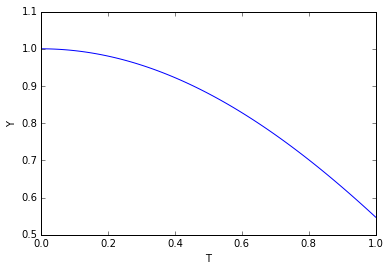

In [4]:
#implement 
F = lambda x: -x
y = f(1,0,0.01,100,F)
t = linspace(0, 1, 100)
plt.plot(t, y)
plt.xlabel('T')
plt.ylabel('Y')        

In [5]:
a =2; b = c = 4; d = 6

### COMPLETE THE FOLLOWING, EITHER WITH TEXT OR COMPUTATIONS OR BOTH

<p>&nbsp;</p>

__ 1.  Basic Statistics (2 pts):__ 
If $X$ is a random variable over $\left( 0,\infty
\right) $ with probability density function 
\begin{equation*}
p\left( x\right) =e^{-x}
\end{equation*}
then what is $\Pr \left( a\leq X\leq d\right) .$

In [6]:
from scipy import integrate
result = integrate.quad(lambda x: exp(-x), a, d)
print "the integral is %.5f" %result[0]

the integral is 0.13286


In [7]:
exp(-a)-exp(-d)

0.13285653105994635

__ 2.  The Central Limit Theorem (3 pts):__ The Earth is (approximately) the interior
of an ellipsoid with equation
\begin{equation*}
\frac{x^{2}}{\left( 6.384\right) ^{2}}+\frac{y^{2}}{\left( 6.384\right) ^{2}}%
+\frac{z^{2}}{\left( 6.353\right) ^{2}}=1
\end{equation*}
in thousands of kilometers. Suppose that out of $1,000,000$ uniformly
randomly generated points $\left( x,y,z\right) $ in the cube $\left[ -7,7
\right] \times \left[ -7,7\right] \times \left[ -7,7\right] $, there are
395,403 trials that satisfy 
\begin{equation*}
\frac{x^{2}}{\left( 6.384\right) ^{2}}+\frac{y^{2}}{\left( 6.384\right) ^{2}}
+\frac{z^{2}}{\left( 6.353\right) ^{2}}\leq 1
\end{equation*}
What is the approximate volume of the earth and what is the standard
deviation for this approximation?

In [65]:
N = 1000000
x = 395403/N
sd = sqrt(x-x**2)/sqrt(N)
print "approximate volume of the earth is %d and standard deviation is %.2f" %(14**3*x, 14**3*sd)

approximate volume of the earth is 1084 and standard deviation is 1.34


注意单位是$10^3$千米，所以再换算体积单位时，要乘以$10^9$
Let X be the random variable which is 1 if a uniformly randomly generated point in the box is also in the ellipsoid, and 0 otherwise. Then p (X) = 0.395403 and the expected value of X is 

$$E (X) = p(x) \times (x==1) + (1-p(x) \times  (x==0)) = 0.395403 (1) + (1 -0.395403) (0) = 0.395403$$

Since $X^2 = X \Rightarrow E(x^2) = E(x)$ the variance of X is 

$$Var(X) = E(x^2) - E(X)^2 = 0.395403 - (0.395403)^2 = 0.23906$$

and thus, the standard deviation is

$$std (X) = \sqrt {Var(X)} = \sqrt {0.23906} = 0.48894$$

__ 3.  Newton's Method and its variants (2 pts):__ Use Newton's method to estimate the
number $c$ for which $$f\left( x\right) =e^{-x^{2}/\left( 2d^{2}\right) } $$
satisfies the Mean Value Theorem over$ \left[ -a,b\right] .$

In [66]:
def f(x):
    return exp(-x**2/(2*d**2))

def fprime(x): #f is differentiable
    return -x/d**2*f(x)

def g(x):
    return fprime(x) - (f(b)-f(-a))/(b+a) #we wanna find the root of g(x)

def gprime(x):
    return -f(x)/d**2 - x*fprime(x)/d**2

     xn           xp           |xn-xp|       fprime - slope
    0.880191     1.000000     0.119809          0.000015612
    0.880771     0.880191     0.000581          0.000000000
    0.880771     0.880771     0.000000          0.000000000


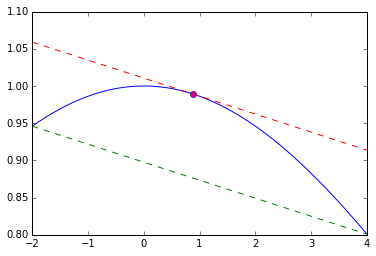

In [67]:
import matplotlib.pyplot as plt

xn = 1
xp = xn  
print('{:^12s} {:^12s} {:>12s} {:>20s}'.format('xn','xp','|xn-xp|','fprime - slope' ) ) 

for n in range(1000):
    xp = xn
    xn = xn - g(xn) / gprime(xn)
    
    print('{:12.6f} {:12.6f} {:12.6f} {:20.9f}'.format(xn,xp,abs(xn-xp), g(xn))  ) 
    
    if( abs(xn-xp) < 10e-6):
        break

        
xdomain = linspace(-a,b,100)
xdomain = linspace(-a,b,100)
#plt.ylim(ymax = 2000, ymin = -2000)
tan = f(xn)+fprime(xn)*(xdomain-xn)
plt.plot(xdomain, f(xdomain))
plt.plot(xn,f(xn),'om',xdomain,tan,'--r')
plt.plot([-a, b], [f(-a), f(b)], '--g')

The number is 0.881

__ 4.  Newton's Method and its variants (5 pts):__ A function $f\left( x\right) $ that
is a 1-1 map of an interval $\left[ a,b\right] $ onto an interval 
$\left[ c,d\right] $ has an _inverse_ $f^{-1}\left( x\right) $ that is a 1-1 map
of $\left[ c,d\right] $ onto $\left[ a,b\right] $ defined by 
\begin{equation*}
y=f^{-1}\left( x\right)      \qquad \text{  same  as  } \qquad    x=f\left( y\right) 
\end{equation*}
where $x\in \left[ c,d\right] $ and $y\in \left[ a,b\right] .$ Use Newton's
method to develop a method for calculating $f^{-1}\left( p\right) $ for a
given $p.$ How would it be used to estimate natural logarithms? 

__solution__: to estimate $Y = e^x$, it's equivalent to find such a Y that that $ln \left (Y \right) - x = 0$

Suppose we want to find $e^5 \approx 148.413159$

Using algorithm below we get an approximate value of 148.096847 

solution value to e^5 is 148.096847


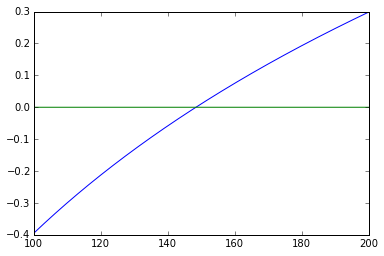

In [68]:
def p(x):
    return log(x) - 5
def prime(u):
    return 1/x

udomain = linspace(100,200,2000)
plt.plot(udomain, p(udomain),udomain,0*udomain)


xn = 148 
xp = xn  

for n in range(100):
    xp = xn
    xn = xn - p(xn) / prime(xn)    
    if( abs(xn-xp) < 10e-6):
        break

print "solution value to e^5 is %.6f" %xn

__ 5.  Fixed Points (3 pts):__ Write a program which uses Newton's method to estimate a nonzero
fixed point of 
\begin{equation*}
f\left( x\right) = ae^{bx}-d
\end{equation*}
Use the program to estimate the fixed point of $f\left( x\right) $.

$g(p) - p = 0$ and p is zero to $f(x) = g(x) - x$

     xn           xp           |xn-xp|        f(xn)
    0.286689     0.300000     0.013311     0.295936314
    0.286307     0.286689     0.000382     0.286314299
    0.286307     0.286307     0.000000     0.286306634
The fix point to this function is 0.286307


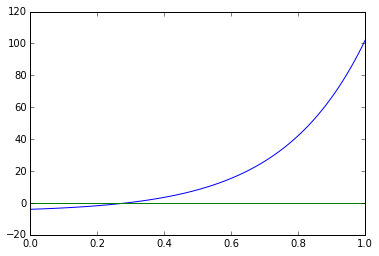

In [79]:
def f(x): 
    return a*exp(b*x)-d -x
def fprime(x): 
    return a*b*exp(b*x) -1

udomain = linspace(0,1,100)
plt.plot(udomain, f(udomain),udomain,0*udomain)

xn = 0.3
xp = xn  
print('{:^12s} {:^12s} {:>12s} {:>12s}'.format('xn','xp','|xn-xp|','f(xn)' ) ) 

for n in range(1000):
    xp = xn
    xn = xn - f(xn) / fprime(xn) 
    print('{:12.6f} {:12.6f} {:12.6f} {:15.9f}'.format(xn,xp,abs(xn-xp), (f(xn)+xn) ))           
    if( abs(xn-xp) < 10e-6):
        break

print "The fix point to this function is %.6f" %xn

__ 6.  Finite Precision Arithmetic (3 pts):__ What is the difference between roundoff
error and truncation error (aka, discretization error)? Are the two concepts
independent of each other?

__Solution:__  
1. truncation error: Error made in one step when we replace an infinite process by a finite one. It can be reduced by applying the same approximation to a larger number of smaller intervals or by switching to a better approximation
2. roundoff error: Error made by computing with limited precision on one step. It is built into machine and you can hardly get rid of it. 

They are independent of each other, the total error is combination of these two

__ 7.  Lagrange Interpolation (2 pts):__ Given points $x_{1},\ldots ,x_{n},$ the
quantities 
\begin{equation*}
\varphi _{i}\left( x\right) =\prod_{j\neq i}\frac{x-x_{j}}{x_{i}-x_{j}}
\end{equation*}
are important in a number of contexts, such as, for instance, in Gaussian
Quadrature. What is the derivative of the natural logarithm of $\varphi
_{i}\left( x\right) ?$

If we take the natural log of $\varphi$

$$log \left( \varphi _{i}\left( x\right) \right) = \sum^n_j log(x-x_j) - \sum^n_j log(x_{i}-x_{j})$$

Then if we take the derivative, we have

$$\frac{\varphi _{i}'\left( x\right)}{\varphi _{i}\left( x\right) } =\sum^n_j\frac{1}{x-x_j}$$



__ 8.  Spline Interpolation (2 pts):__ For $k$ arbitrary, define the function 
\begin{equation*}
f\left( x\right) =\left\{ 
\begin{array}{ccc}
ax^{2}-ax+b & if & 0\leq x\leq 1 \\ 
d\left( x-1\right) ^{2}+k\left( x-1\right) +b & if & 1\leq x\leq 2
\end{array}
\right. 
\end{equation*}
For what value of $k$ is $f\left( x\right) $ a quadratic spline that is
smooth at $x=1? $

$$f(1_-) = f(1_+) \quad and \quad f'(1_-) = f'(1_+)$$

when k = a = 2, the quadratic spline is smooth at x = 1

__ 9.  Limit Acceleration Using Richardson (5 pts):__ The Euler-Mascheroni constant
(aka, Euler's constant) is defined 
\begin{equation*}
\gamma =\lim_{n\rightarrow \infty }\left( \sum_{k=1}^{n}\frac{1}{k}-\ln
\left( n\right) \right) 
\end{equation*}
Use a Richardson's acceleration to find $\gamma $ accurate to 5 decimal
places. 

$(n + 1) S (n + 1) -nS(n)$ is an accelerated convergence method. 

In [81]:
def f(n):
    result = 0
    for i in range(1,n+1):
        result += 1/i
    return result - log(n)

def Richardson(n): #equation(4)
    return (n**2*f(n)-2*(n+1)**2*f(n+1)+(n+2)**2*f(n+2))/2

tolerance = 10**(-5)

fn = f(1)
print('{:^0s} {:^13s} {:>12s} {:>9s}'.format('n','n-1','|f(n)-f(n-1)|','f(n)' ) ) 

for n in range(2,1000):
    fp = fn
    fn = Richardson(n)
    
    print('{:0.0f} {:6.0f} {:15.6f} {:22.10f}'.format(n,n-1,abs(fn-fp), fn )  ) 
    
    if( abs(fn-fp) < tolerance):
        break

n      n-1      |f(n)-f(n-1)|      f(n)
2      1        0.422472           0.5775280146
3      2        0.000214           0.5773139068
4      3        0.000058           0.5772558091
5      4        0.000021           0.5772350016
6      5        0.000009           0.5772260953


__ 10.  Trapezoidal Rule (5 pts):__ Show that if $f\left( x\right) \geq 0$ and $
f^{\prime \prime }\left( x\right) \leq 0$ over $\left[ p,q\right] ,$ then
the best trapezoidal rule approximation over the partition 
\begin{equation*}
p=x_{0}<x_{1}<x_{2}=q
\end{equation*}
occurs when $x_{1}$ is the number $c$ that satisfies the Mean Value Theorem for $
f\left( x\right) $ over $\left[ p,q\right] $. Use this to estimate the area
under the curve $y=e^{-x^{2}/\left( 2d^{2}\right) } $over$ \left[ -a,b
\right] $. Notice that you estimated the number $c$ in problem 3.

The trapezoid rule says:

$$\int^q_pf(x)dx \approx \frac{\Delta x_1\left( f(p)+f(x_1) \right)}{2} +\frac{\Delta x_2\left( f(x_1)+f(q) \right)}{2}$$




In [82]:
eps = 0.880771
def f(x):
    return exp(-x**2/(2*d**2))
new_method = (b-eps)*(f(b)+f(eps))/2 +(eps+a)*(f(-a)+f(eps))/2
print "result using trapezoid rule is %.5f" %new_method

result using trapezoid rule is 5.57924


![](http://snag.gy/iecVo.jpg)

The area of the two trapezoid is $A(c) = \frac{f(c) + f(p)}{2}(c-p) + \frac{f(q) + f(c)}{2}(q-c)$ 

The maximum occurs when $A'(c) = 0$, which is when

$$\frac{f'(c)}{2}(c-p) + \frac{f(c) + f(p)}{2} + \frac{f'(c)}{2}(q-c) - \frac{f(q) + f(c)}{2} = 0$$

And solve this euqation we get $f'(c) = \frac{f(q) - f(p)}{q-p}$

__ 11.  Romberg Integration (5 pts):__ Use Romberg integration to estimate the area
under the curve $y=e^{-x^{2}/\left( 2d^{2}\right) } $over$ \left[ -a,b \right] $.  That is, begin with the Trapezoidal rule and then use Richardson extrapolation. 

In [122]:
def f(x):
    return exp(-x**2/(2*d**2))

def trapezoid(a,b,h):
    n = int((b-a)/h)
    x0 = a
    output =f(a)
    for i in range(2,n+1):
        x  = x + h
        output = output + 2. * f(x)
    output = (output + f(b)) * h/2
    return output

In [123]:
def romberg(f, a, b, eps=1e-5):
    R = [[(b - a)/2 * (f(a) + f(b))]]  # R[0][0]
    n = 1
    while True:
        h = float(b - a) / 2 ** n
        R.append([None] * (n + 1))  # Add an empty row.
        R[n][0] = R[n-1][0]/2 + h*sum(f(a+(2*k-1)*h) for k in xrange(1, 2**(n-1)+1))
        for m in xrange(1, n+1):
            R[n][m] = R[n][m-1] + (R[n][m-1] - R[n-1][m-1]) / (4 ** m - 1)
        if abs(R[n][n-1] - R[n][n]) < eps:
            return R[n][n]
        n += 1

In [125]:
result = romberg(lambda x: f(x), -a, b)
print "romberg integration gives %.5f" %result

romberg integration gives 5.68603


__ 12.  Well-conditioning (3 pts):__ Show that $y=x^{c}$ for any $c>0$ is a solution to 
\begin{equation*}
xyy^{\prime \prime }+yy^{\prime }=x\left( y^{\prime }\right) ^{2},y\left(
0\right) =0, y\left( 1\right) =1
\end{equation*}
Use it to explain why this problem is ill-conditioned.

plug in $y = x^c$, noted that $y' = cx^{c-1}$ and $y'' = c(c-1)x^{c-2}$, we get

$$
\begin{align*} 
c(c-1)x^{c-2}x^cx + x^ccx^{c-1} &= x(cx^{c-1})^2 \\
c^2x^{2c-1} &= c^2x^{2c-1}\\
\end{align*}
$$

The absolute error is computed by differencing true value and approximate value. Suppose $y=x^c$ is a solution, then $\frac{f(x+\Delta x)-f(x)}{f(x)} \approx f'(x)\Delta x = cx^{r-1}\Delta x$. This implies that for large positive number x, a small error occuring in the computation of x will introduce large __truncation error__ in computing the function. Therefore, the problem is ill-conditioned. 

__ 13.  ODEINT in Scipy(2 pts):__ What solution does ODEINT produce for the problem in #12?  Is this a flaw of ODEINT?  

In [96]:
from scipy.integrate import odeint

def g(y, x):
    y0 = y[0]
    y1 = y[1]
    y2 = (x*y1**2-y0*y1)/(x*y0)
    return y1, y2

# Initial conditions on y, y' at x=0
init = 0.0, 1.0
# First integrate from 0 to 2
x = np.linspace(0,2,100)
sol=odeint(g, init, x)
sol[:5,]


/Users/dennis/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in double_scalars


array([[  0.,   1.],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan]])

It produces initial value and not-a-number value. 

__ 14.  ODEINT in Scipy (3 pts): __ Find and plot a numerical
solution to 
\begin{equation*}
y^{\prime \prime }+ax^{b}y=0,  y\left( 0\right) =1,  y^{\prime }\left(
0\right) =0
\end{equation*}

for $x$ in $[-a,d]$.  

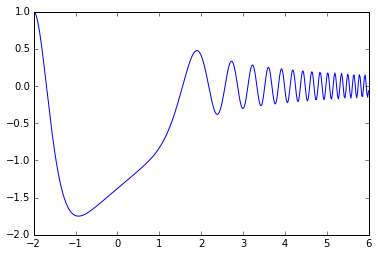

In [100]:
def g(y, x):
    y0 = y[0]
    y1 = y[1]
    y2 = -a*x**b*y0
    return y1, y2

# Initial conditions on y, y' at x=0
init = 1.0, 0.0
# First integrate from 0 to 2
x = np.linspace(-a,d,400)
sol=odeint(g, init, x)
plt.plot(x, sol[:,0], color='b')



__ 15. Pade Approximation (5 pts):__  For what values of $A,B,C,D,$ and $E$ does the function  
$$ P(x) = \frac{A + Bx + Cx^2}{1 + Dx + Ex^2} $$  have the same Taylor polynomial as $$f(x) = d\cos(bx)$$.  
centered at 0.  

In [118]:
from scipy.misc import pade, factorial

$\cos(x) = 1 - \frac{x^2}{2} + \frac{x^4}{24}$ 

$\cos(6x) = 1 + 0x - \frac{36x^2}{2} + 0x^3 + \frac{(6x)^4}{24}$ 


In [119]:
coeff = [1,0,-18,0,6**4/24]

In [120]:
pade(coeff, 2) #second degree polynomial in the denominator

(poly1d([-15.,   0.,   1.]), poly1d([ 3.,  0.,  1.]))

$$\cos(10x) \approx \frac{1-15x^2}{1+3x^2}$$

$$
A = 1 \\
B = 0 \\
C = -15 \\
D = 0 \\
E = 3 
$$